In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc 
import numpy as np

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

On va créer des datasets pour chaque candidats :

In [36]:
df = pd.read_csv("resultats-par-niveau-burvot-t1-france-entiere.txt", header = 0, sep=';', encoding = 'latin-1')
df0 = df[['Code du département', 'Libellé du département', 'Code de la commune', 'Libellé de la commune', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot']]
df_AN = df[['Sexe.AN', 'Nom.AN', 'Prénom.AN', 'Voix.AN', '% Voix/Ins.AN', '% Voix/Exp.AN']]
df_RF = df[['Sexe.RF', 'Nom.RF', 'Prénom.RF', 'Voix.RF', '% Voix/Ins.RF', '% Voix/Exp.RF']]
df_ME = df[['Sexe.ME', 'Nom.ME', 'Prénom.ME', 'Voix.ME', '% Voix/Ins.ME', '% Voix/Exp.ME']]
df_LJ = df[['Sexe.LJ', 'Nom.LJ', 'Prénom.LJ', 'Voix.LJ', '% Voix/Ins.LJ', '% Voix/Exp.LJ']]
df_LPM = df[['Sexe.LPM', 'Nom.LPM', 'Prénom.LPM', 'Voix.LPM', '% Voix/Ins.LPM', '% Voix/Exp.LPM']]
df_ZE = df[['Sexe.ZE', 'Nom.ZE', 'Prénom.ZE', 'Voix.ZE', '% Voix/Ins.ZE', '% Voix/Exp.ZE']]
df_MJL = df[['Sexe.MJL', 'Nom.MJL', 'Prénom.MJL', 'Voix.MJL', '% Voix/Ins.MJL', '% Voix/Exp.MJL']]
df_HA = df[['Sexe.HA', 'Nom.HA', 'Prénom.HA', 'Voix.HA', '% Voix/Ins.HA', '% Voix/Exp.HA']]
df_JY = df[['Sexe.JY', 'Nom.JY', 'Prénom.JY', 'Voix.JY', '% Voix/Ins.JY', '% Voix/Exp.JY']]
df_PV = df[['Sexe.PV', 'Nom.PV', 'Prénom.PV', 'Voix.PV', '% Voix/Ins.PV', '% Voix/Exp.PV']]
df_PP = df[['Sexe.PP', 'Nom.PP', 'Prénom.PP', 'Voix.PP', '% Voix/Ins.PP', '% Voix/Exp.PP']]
df_DAN = df[['Sexe.DAN', 'Nom.DAN', 'Prénom.DAN', 'Voix.DAN', '% Voix/Ins.DAN', '% Voix/Exp.DAN']]

c:\Users\hedil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
print("Nombre de variables dans le dataset général : ", df.shape[1])
print("Nombre d'observations dans le dataset général : ", df.shape[0])

print("Nombre de variables dans le dataset 0 : ", df0.shape[1])
print("Nombre d'observations dans le dataset 0 : ", df0.shape[0])

print("Nombre de variables dans un dataset candidat : ", df_AN.shape[1])
print("Nombre d'observations dans un dataset candidat : ", df_AN.shape[0])

Nombre de variables dans le dataset général :  105
Nombre d'observations dans le dataset général :  69681
Nombre de variables dans le dataset 0 :  18
Nombre d'observations dans le dataset 0 :  69681
Nombre de variables dans un dataset candidat :  6
Nombre d'observations dans un dataset candidat :  69681


On calcule le nombre d'inscrits, de participants et de personnes s'étant abstenues :

Nombre d'inscrits :  48747231
Nombre de votes exprimés :  35132427
Nombre d'abstentionnistes :  12824061
Nombre de votes blancs :  543593
Nombre de votes nuls :  247150


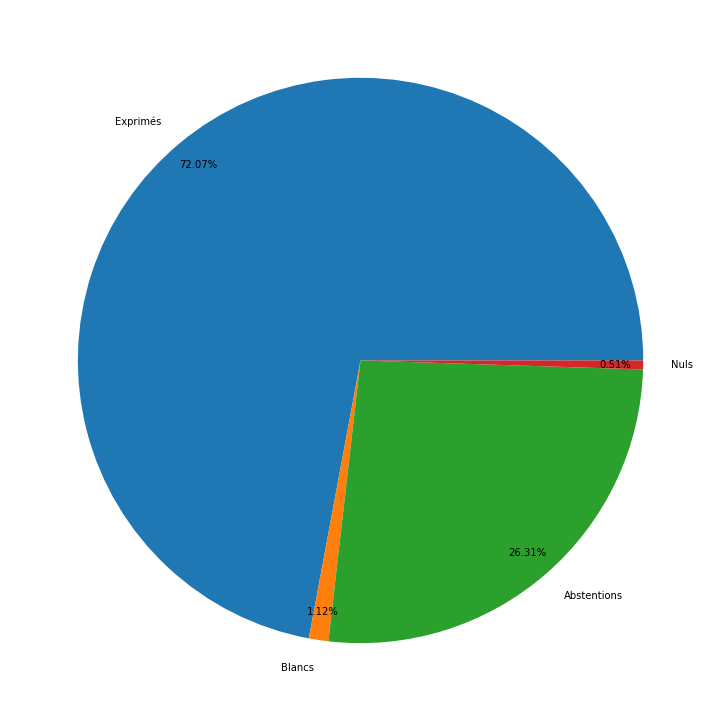

In [38]:
#Stats générales : 

totalIns = np.sum(df['Inscrits'])
totalExp = np.sum(df['Exprimés'])
totalBlanc = np.sum(df['Blancs'])
totalAbs = np.sum(df['Abstentions'])
TotalNuls = np.sum(df['Nuls'])

print("Nombre d'inscrits : ", totalIns)
print("Nombre de votes exprimés : ", totalExp)
print("Nombre d'abstentionnistes : ", totalAbs)
print("Nombre de votes blancs : ", totalBlanc)
print("Nombre de votes nuls : ", TotalNuls)

statParticipation = np.array([totalExp, totalBlanc, totalAbs, TotalNuls])

labelParticipation = ['Exprimés', 'Blancs', 'Abstentions', 'Nuls']

camembertDepObs = plt.pie(statParticipation, labels=labelParticipation, normalize = True, autopct = lambda statParticipation: str(round(statParticipation, 2)) + '%', pctdistance=0.9)
plt.rcParams["figure.figsize"] = [8, 8]
plt.show()

In [39]:
# Quels sont les différents taux ?

rappExp = 100*totalExp/totalIns
rappAbs = 100*totalAbs/totalIns
rappBlanc = 100*totalBlanc/totalIns
rappNul = 100*TotalNuls/totalIns



print("Abstention : ", round(rappAbs, 2), "%")
print("Participation : ", round(rappExp, 2), "%")
print("Dont", round(rappBlanc, 2), "% de votes blancs")
print("Votes nuls : ", round(rappNul, 2), "%")

Abstention :  26.31 %
Participation :  72.07 %
Dont 1.12 % de votes blancs
Votes nuls :  0.51 %


Une abstention de 26.31%, ce qui est assez remarquable.
Plus que n'importe quel candidat.
Traçons les diagrammes camemberts des résultats sans puis avec abstentions et votes blancs:

## Voyons les résultats des candidats par départements

In [40]:
df_ZE_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.ZE', aggfunc = 'sum')
df_DAN_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.DAN', aggfunc = 'sum')
df_AN_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.AN', aggfunc = 'sum')
df_HA_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.HA', aggfunc = 'sum')
df_JY_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.JY', aggfunc = 'sum')
df_LJ_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.LJ', aggfunc = 'sum')
df_LPM_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.LPM', aggfunc = 'sum')
df_ME_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.ME', aggfunc = 'sum')
df_MJL_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.MJL', aggfunc = 'sum')
df_PV_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.PV', aggfunc = 'sum')
df_PP_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.PP', aggfunc = 'sum')
df_RF_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.RF', aggfunc = 'sum')
df_BLANC_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Blancs', aggfunc = 'sum')
df_ABS_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Abstentions', aggfunc = 'sum')
df_NUL_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Nuls', aggfunc = 'sum')

# On va créer la fonction qui donne un camembert des résultats en fonction du département :

In [41]:
def camembertDepObs(depObs):
    voixCandidatDepObs = np.array([np.sum(df_AN_dep['Voix.AN'][depObs]), np.sum(df_RF_dep['Voix.RF'][depObs]), 
    np.sum(df_ME_dep['Voix.ME'][depObs]), np.sum(df_LJ_dep['Voix.LJ'][depObs]), 
    np.sum(df_LPM_dep['Voix.LPM'][depObs]), np.sum(df_ZE_dep['Voix.ZE'][depObs]), 
    np.sum(df_MJL_dep['Voix.MJL'][depObs]), np.sum(df_HA_dep['Voix.HA'][depObs]), 
    np.sum(df_JY_dep['Voix.JY'][depObs]), np.sum(df_PV_dep['Voix.PV'][depObs]), 
    np.sum(df_PP_dep['Voix.PP'][depObs]), np.sum(df_DAN_dep['Voix.DAN'][depObs]),
    np.sum(df_BLANC_dep['Blancs'][depObs]), np.sum(df_ABS_dep['Abstentions'][depObs]), np.sum(df_NUL_dep['Nuls'][depObs])])

    labelDepObs = [df['Nom.AN'][0], df['Nom.RF'][0], df['Nom.ME'][0], df['Nom.LJ'][0], df['Nom.LPM'][0], df['Nom.ZE'][0], df['Nom.MJL'][0], df['Nom.HA'][0], 
    df['Nom.JY'][0], df['Nom.PV'][0], df['Nom.PP'][0], df['Nom.DAN'][0], 'BLANCS', 'ABSTENTIONS', 'NULS']

    camembertDepObs = plt.pie(voixCandidatDepObs, labels=labelDepObs, normalize = True, autopct = lambda voixCandidatDepObs: str(round(voixCandidatDepObs, 2)) + '%', pctdistance=0.9)
    plt.rcParams["figure.figsize"] = [13, 13]
    plt.show()

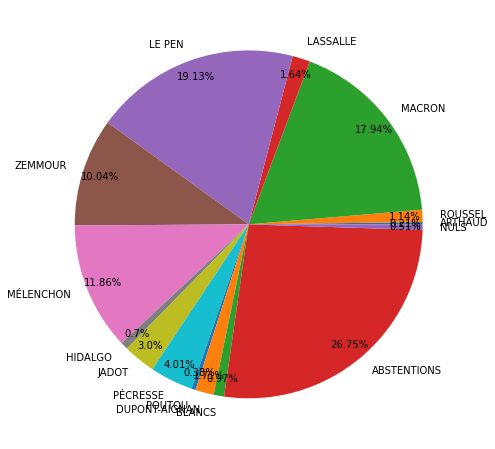

In [42]:
depObs = 'Alpes-Maritimes'

camembertDepObs(depObs)

# Regardons les différents résultats des candidats en fonctions de la commune ou du département :

In [43]:
def comm_candidat(voix, prct, choix, asc):
    tab = df[['Libellé de la commune', voix]]
    tab1 = df[['Libellé de la commune', prct]]
      
    frame = pd.DataFrame(tab)
    frame1 = pd.DataFrame(tab1)
     
    res = frame.groupby(["Libellé de la commune"]).sum()
    a = res.reset_index()
    res1 = frame1.groupby(["Libellé de la commune"]).mean()
    b = res1.reset_index()

        
    total = a.merge(b)

    if choix == 1 : 
            resultat = total.sort_values(by=voix,ascending=asc) 
    elif choix == 2 :
            resultat = total.sort_values(by=prct,ascending=asc)

    return resultat

In [44]:
def dep_candidat(voix, prct, choix, asc):
    tab = df[['Libellé du département', voix]]
    tab1 = df[['Libellé du département', prct]]
      
    frame = pd.DataFrame(tab)
    frame1 = pd.DataFrame(tab1)
     
    res = frame.groupby(["Libellé du département"]).sum()
    a = res.reset_index()
    res1 = frame1.groupby(["Libellé du département"]).mean()
    b = res1.reset_index()

        
    total = a.merge(b)

    if choix == 1 : 
            resultat = total.sort_values(by=voix,ascending=asc) 
    elif choix == 2 :
            resultat = total.sort_values(by=prct,ascending=asc)

    return resultat

In [45]:
comm_candidat('Voix.MJL', '% Voix/Ins.MJL', 2, False)

,Libellé de la commune,Voix.MJL,% Voix/Ins.MJL
16917,Loubaut,18,72.00
9238,Eourres,71,69.61
30661,Vachères-en-Quint,22,64.71
23268,Quirbajou,25,59.52
18773,Molezon,50,58.14
...,...,...,...
12450,Hodenc-l'Evêque,0,0.00
11471,Gourdièges,0,0.00
3201,Blanzée,0,0.00
32503,Voncourt,0,0.00


In [46]:
max(dep_candidat('Voix.LJ', '% Voix/Ins.LJ', 2, False)['Voix.LJ'])

48246

In [47]:
dep_candidat('Voix.LJ', '% Voix/Ins.LJ', 2, False)

,Libellé du département,Voix.LJ,% Voix/Ins.LJ
82,Pyrénées-Atlantiques,48246,11.948920
46,Hautes-Pyrénées,14761,11.107982
33,Gers,11720,9.396739
62,Lozère,4722,9.316085
38,Haute-Corse,8601,8.421446
...,...,...,...
68,Mayotte,359,0.391475
66,Martinique,1162,0.374174
75,Nouvelle-Calédonie,1031,0.355724
35,Guadeloupe,1033,0.323848


## Essayons maintenant de faire une ACP par département

In [48]:
df_acp_dep = df[['Libellé du département', 'Voix.ME', 'Voix.LPM', 'Voix.MJL', 'Voix.ZE', 'Voix.PV', 'Voix.JY', 'Voix.LJ', 'Voix.DAN', 'Voix.HA', 'Voix.RF', 'Voix.PP', 'Voix.AN', 'Blancs', 'Abstentions', 'Nuls']].groupby('Libellé du département').sum()
df_acp_dep.reset_index()
df_acp_dep

,Voix.ME,Voix.LPM,Voix.MJL,Voix.ZE,Voix.PV,Voix.JY,Voix.LJ,Voix.DAN,Voix.HA,Voix.RF,Voix.PP,Voix.AN,Blancs,Abstentions,Nuls
Libellé du département,,,,,,,,,,,,,,,
Ain,92056,86606,57766,27487,17546,15813,10858,8977,5639,5932,2169,1655,5625,97433,1902
Aisne,58721,104342,41172,18266,10920,7074,6468,5790,2983,5968,2118,2038,3767,101089,2828
Allier,49706,50315,31013,12361,10319,5982,7782,4216,3280,8119,1503,1359,3749,58497,1790
Alpes-Maritimes,139707,148919,92345,78208,31260,23374,12767,13307,5414,8858,2989,1627,7550,208250,4007
Alpes-de-Haute-Provence,20800,26010,21856,7926,3834,3957,4309,2504,1396,2721,865,505,1478,29290,624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vienne,67831,54214,49162,11939,9959,10727,7741,5095,4542,6412,2315,1715,4053,68304,2002
Vosges,51432,65646,32655,13184,9344,7562,7203,6152,3114,3847,1986,1569,3431,68914,1874
Wallis et Futuna,2115,579,501,118,1354,72,78,244,118,34,48,98,27,4125,17


Le tableau représente les résultats de chaque candidats (variables) pour chaque départements (observations).
On va maintenant centrer et réduire les données de ce tableau :

In [62]:
sc = StandardScaler()

Z = sc.fit_transform(df_acp_dep)
Z = pd.DataFrame(Z)
Z

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.008157,0.176518,-0.217191,0.206211,0.143038,0.040690,0.076027,0.476756,-0.026847,-0.242196,-0.194066,-0.148104,0.156694,-0.192479,-0.272903
1,-0.425529,0.472140,-0.468994,-0.240040,-0.367988,-0.552257,-0.514873,-0.213937,-0.609261,-0.236633,-0.222830,0.155278,-0.377806,-0.161089,0.346763
2,-0.542814,-0.428377,-0.623150,-0.525812,-0.414339,-0.626350,-0.338007,-0.555057,-0.544134,0.095781,-0.569686,-0.382572,-0.382985,-0.526780,-0.347852
3,0.628092,1.215146,0.307523,2.660855,1.200721,0.553709,0.332981,1.415161,-0.076185,0.209985,0.268408,-0.170284,0.710469,0.758986,1.135733
4,-0.918878,-0.833491,-0.762101,-0.740444,-0.914491,-0.763747,-0.805477,-0.926085,-0.957262,-0.738421,-0.929513,-1.059042,-1.036295,-0.777549,-1.128122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,-0.307009,-0.363389,-0.347751,-0.546235,-0.442104,-0.304398,-0.343525,-0.364558,-0.267399,-0.168017,-0.111723,-0.100577,-0.295531,-0.442578,-0.205984
103,-0.520358,-0.172841,-0.598234,-0.485983,-0.489535,-0.519146,-0.415941,-0.135484,-0.580535,-0.564410,-0.297277,-0.216227,-0.474465,-0.437341,-0.291640
104,-1.161969,-1.257372,-1.086150,-1.118313,-1.105759,-1.027347,-1.374975,-1.415876,-1.237504,-1.153668,-1.390295,-1.381435,-1.453712,-0.993613,-1.534318
105,-0.635041,-0.347554,-0.614227,-0.497743,-0.491232,-0.630760,-0.664549,-0.473136,-0.762100,-0.537211,-0.578709,-0.506142,-0.680441,-0.534920,-0.754717


In [69]:
#print("Est-ce centré ? ", np.mean(Z,axis=0))
#print("Est-ce réduit ? ", np.std(Z,axis=0,ddof=0))

Est-ce centré ?  0    -4.565403e-17
1    -2.645859e-17
2     1.079095e-16
3     8.715770e-17
4     5.395476e-17
5     3.942848e-17
6     9.493963e-17
7     1.867665e-17
8    -7.055623e-17
9    -7.366900e-17
10   -1.006464e-16
11    1.006464e-16
12   -1.224358e-16
13    4.565403e-17
14   -8.093215e-17
dtype: float64
Est-ce réduit ?  0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
dtype: float64


Les observations suivent donc une loi normale centrée réduite.

In [70]:
acp = PCA(svd_solver='full')
print(acp)

PCA(svd_solver='full')


In [71]:
coord = acp.fit_transform(Z)
print(acp.n_components_)

15


In [72]:
print(acp.explained_variance_)

[1.19445659e+01 9.05722045e-01 7.31778721e-01 4.54593076e-01
 3.94975674e-01 2.40476753e-01 1.96992684e-01 9.22523773e-02
 7.69478332e-02 3.53965432e-02 2.38982134e-02 1.82804171e-02
 1.24734834e-02 7.97300064e-03 5.18272655e-03]


In [74]:
n = df_acp_dep.shape[0]

p = df_acp_dep.shape[1]

In [75]:
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.18329344e+01 8.97257353e-01 7.24939667e-01 4.50344543e-01
 3.91284313e-01 2.38229306e-01 1.95151631e-01 9.13902056e-02
 7.62286946e-02 3.50657344e-02 2.36748656e-02 1.81095720e-02
 1.23569088e-02 7.89848662e-03 5.13428985e-03]


In [76]:
print(acp.explained_variance_ratio_)

[7.88862295e-01 5.98171569e-02 4.83293111e-02 3.00229695e-02
 2.60856209e-02 1.58819537e-02 1.30101088e-02 6.09268037e-03
 5.08191297e-03 2.33771563e-03 1.57832438e-03 1.20730480e-03
 8.23793920e-04 5.26565774e-04 3.42285990e-04]


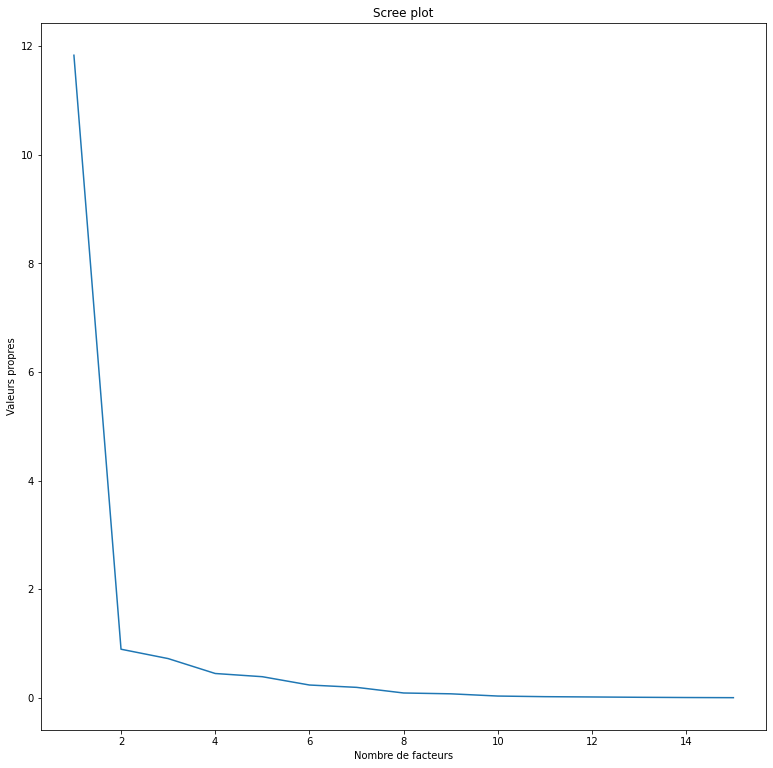

In [78]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Valeurs propres")
plt.xlabel("Nombre de facteurs")
plt.show()

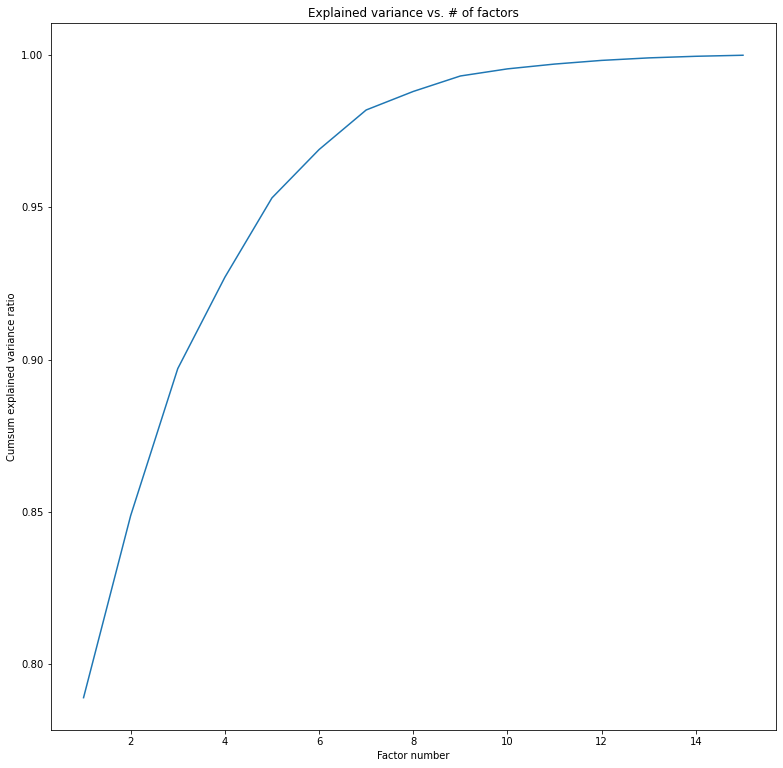

In [79]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [81]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

    Val.Propre    Seuils
0    11.832934  3.318229
1     0.897257  2.318229
2     0.724940  1.818229
3     0.450345  1.484896
4     0.391284  1.234896
5     0.238229  1.034896
6     0.195152  0.868229
7     0.091390  0.725372
8     0.076229  0.600372
9     0.035066  0.489261
10    0.023675  0.389261
11    0.018110  0.298352
12    0.012357  0.215018
13    0.007898  0.138095
14    0.005134  0.066667


In [100]:
cf = pd.DataFrame(coord,index=df_acp_dep.index,columns=np.arange(1,p+1))
cf

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Libellé du département,,,,,,,,,,,,,,,
Ain,0.004559,-0.021217,0.195932,-0.399959,0.471053,-0.058889,-0.349128,-0.005472,-0.080793,-0.258753,-0.033505,-0.051188,0.035515,0.080975,0.004087
Aisne,-0.891196,-0.625696,-0.863537,-0.141059,0.088947,0.197115,-0.066176,-0.324399,0.030701,0.257910,-0.121204,0.118460,-0.032147,0.101060,-0.087125
Allier,-1.734453,-0.329894,-0.040445,-0.138947,-0.157497,-0.079807,0.342079,-0.162392,0.177022,-0.130778,0.260835,-0.100779,0.015879,-0.105121,0.003692
Alpes-Maritimes,2.858708,0.422527,-0.373194,-0.782792,2.192264,0.944313,-0.060073,-0.627541,-0.150673,0.303449,0.211940,-0.241578,0.003054,-0.113584,0.020511
Alpes-de-Haute-Provence,-3.430411,0.170433,0.086725,-0.183725,0.082452,-0.173856,0.233771,0.126070,-0.175420,0.068035,0.078984,0.059231,-0.023051,0.029208,0.017723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vienne,-1.171259,-0.204024,-0.049451,-0.040169,-0.419716,-0.084861,-0.052763,0.027325,-0.043620,0.101479,0.097170,-0.003132,-0.002788,-0.061461,0.052398
Vosges,-1.598702,-0.315022,-0.245386,-0.168878,0.054692,-0.004214,-0.345706,0.013661,-0.024083,0.102460,0.001317,0.081456,0.053270,0.005951,-0.016054
Wallis et Futuna,-4.813125,0.519041,-0.023682,-0.278071,-0.079823,-0.260328,0.254159,0.013369,-0.176652,0.045593,-0.009110,0.074898,-0.019180,0.032921,0.020703


In [ ]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
for i in range(n):
    plt.annotate(df_acp_dep.index[i],(coord[i,0],coord[i,1]))
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.show()

# Pas ouf comme représentation

In [86]:
di = np.sum(Z**2,axis=1)
pd.DataFrame({'ID':df_acp_dep.index,'d_i':di})

,ID,d_i
0,Ain,0.631165
1,Aisne,2.222721
2,Allier,3.450609
3,Alpes-Maritimes,15.429335
4,Alpes-de-Haute-Provence,11.992459
...,...,...
102,Vienne,1.632610
103,Vosges,2.887375
104,Wallis et Futuna,23.693234
105,Yonne,5.232959


In [88]:
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
    
pd.DataFrame({'id':df_acp_dep.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})

,id,COS2_1,COS2_2
0,Ain,0.000033,0.000713
1,Aisne,0.357323,0.176134
2,Allier,0.871825,0.031539
3,Alpes-Maritimes,0.529654,0.011571
4,Alpes-de-Haute-Provence,0.981260,0.002422
...,...,...,...
102,Vienne,0.840280,0.025496
103,Vosges,0.885180,0.034370
104,Wallis et Futuna,0.977755,0.011371
105,Yonne,0.960139,0.000225


In [91]:
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
    
pd.DataFrame({'id':df_acp_dep.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

,id,CTR_1,CTR_2
0,Ain,1.641513e-08,0.000005
1,Aisne,6.272926e-04,0.004078
2,Allier,2.376012e-03,0.001134
3,Alpes-Maritimes,6.454510e-03,0.001860
4,Alpes-de-Haute-Provence,9.294289e-03,0.000303
...,...,...,...
102,Vienne,1.083503e-03,0.000434
103,Vosges,2.018639e-03,0.001034
104,Wallis et Futuna,1.829692e-02,0.002806
105,Yonne,3.968307e-03,0.000012


In [ ]:
print(np.sum(ctr,axis=0))
print(acp.components_)
#Pas important

In [93]:
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))

for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
print(corvar)

[[ 9.60886374e-01  2.19111310e-01  5.86805655e-02 -3.91117252e-02
  -4.52999888e-02 -9.69622600e-02 -3.04978408e-02 -6.48636575e-02
   4.55814536e-02  3.29538695e-03 -1.53359955e-02  2.80109122e-02
  -2.91948361e-02  3.78546469e-03  5.61096432e-02]
 [ 8.51337085e-01 -4.04977941e-01 -2.18261550e-01 -1.02586001e-01
   1.81407492e-01 -7.73859020e-02  4.98439317e-02 -5.61863805e-02
  -4.82762859e-02  1.32966217e-02 -5.68348909e-02  1.48654663e-02
  -3.92526942e-04  5.02720799e-02 -5.60691369e-03]
 [ 9.18279172e-01  2.13375967e-01 -2.80767397e-02 -1.83323660e-02
  -1.02241947e-01  1.68018138e-01  1.72538608e-01  1.94755090e-01
  -2.66049425e-02 -4.64536285e-03 -3.95110579e-02  3.63289657e-02
   4.37235915e-03  9.30916802e-03  3.30993275e-03]
 [ 8.92015507e-01  1.61158453e-01  4.79119101e-02 -1.35938007e-01
   3.58554649e-01  9.04413688e-02  9.09185248e-02 -4.29857547e-02
  -7.41728167e-02  4.62457870e-02 -1.43038168e-02 -2.90449343e-02
  -1.46194014e-02 -4.24760988e-02 -3.63380518e-04]
 [ 8

In [95]:
pd.DataFrame({'id':df_acp_dep.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})

,id,COR_1,COR_2
0,Voix.ME,0.960886,0.219111
1,Voix.LPM,0.851337,-0.404978
2,Voix.MJL,0.918279,0.213376
3,Voix.ZE,0.892016,0.161158
4,Voix.PV,0.887973,0.317675
5,Voix.JY,0.916509,0.313677
6,Voix.LJ,0.675694,-0.362793
7,Voix.DAN,0.923279,-0.112876
8,Voix.HA,0.921781,0.078956
9,Voix.RF,0.905501,-0.241106


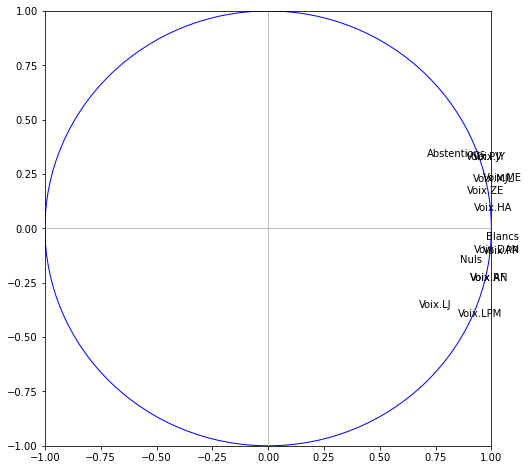

In [97]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(df_acp_dep.columns[j],(corvar[j,0],corvar[j,1]))
    
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()